**Выбросы данных**\
Выброс(аномалия) - это наблюдение,  которое существенно выбивается из  общго распределния и сильно отличается от других данных\
*Чем опастны выбросы?*
 Они могут шокировать модель( модель будет анализировать не верные данные и подстраиваться под них ). Из-за этого качество моделирования падает\
Выбросы мы или исключаем из  данных или корректируем их  значения на что-то правдоподобное. если выбросов много,  то создаем новый датасет и обучаем модель отдельно под них\
**причины появления Выбросов**\
1.  Ошибка ввода данных. как и с пропусками здесь играет роль человеческий фактор( лишний ноль )
2. Ошибки ввода выборки. Когда начинающие спец составляют обычающую выборку для моделирования, они часто допускают ошибку,  вы выделив отдельную группу данных . Типичный пример: смешать все вместе данные об уровне среднего класса ,  опрошенного на улице и добавить туда людей из  писка forbes
3. Преднамеренное искажение или мошеничество. Пользователи приложения часто намеренно указывают неверные данные о себе.  Например ,  прибавляя к своему возрасту лишнюю сотню  лет,  создавая головную боль дата саинтистам 

**Методы выявления выбросов**

*Метод ручного поиска и здравого смысла*

Это самый трудоемкий способ,тк как нам необзодимо искать выбросы самостоятельно .  К примеру у давайте рассчитаем статистические данные (мин, мах среднее,  квантили )  и попробуем по ним отпределить наличие аномалий. Используя метод desribe()

In [2]:
#импортируем данные 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
#импортируем базу данных сбера

sber_data =  pd.read_csv('D:\idi\DATA\sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [3]:
sber_data['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

Метод discribe гоорит нам о том что у нас есть кв с 0  жилой площалью  и так же что 75 квантиль  равен 45  а максимум превышает 7000кв.м 

In [4]:
# найдем кв с 0 жилой площадью
print(sber_data[sber_data['life_sq'] == 0].shape[0])

45


Но мы знаем что такие кв могут существовать как апартаменты ( вид коммерческой недвижимости,  которая юридически не яляется жилой площадью)

In [5]:
#теперь проверим кв с площадью более 7000 кв.м
display(sber_data[sber_data['life_sq']>7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


таких  кв всего 1 ,  и жилая площать в разы выше всей площади ,  но такого не может быть ,  поэтому вы проверим а много ли вообще таких кв 

In [6]:
outliers= sber_data[sber_data['life_sq']> sber_data['full_sq']]
print(outliers.shape[0])

37


Таких  кв всего 37.  такие наблюдения являются ошибочными и не поддаются здравому смыслу. поэтому мы их удаляем методом drop()

In [7]:
cleaned =  sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


In [8]:
# еще пример , кол-во этажей0
display(sber_data['floor'].describe())

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [9]:
#снова видим странность,  максимальное колво этажей равно 77/
# проверяем все кв с этажностью больше 50 
display(sber_data[sber_data['floor']>50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


Проверяя ломоносовский р-н узнаем что домов с такой этажностью нет ,  а во всей мск есть только в москва-сити 


In [10]:
#удаляем данный выброс
outliers_2 = sber_data[sber_data['floor']>50]
cleaned_2 = sber_data.drop(outliers_2.index , axis=0)
print(f'Результирующее число записей: {cleaned_2.shape[0]}')

Результирующее число записей: 30470


**Метод мужквартильного размаха (метод Тьюки**)\
Отличным помощником в поиске выбросов является визуализация .  если признак является числовым   то можно построить гистограмму или коробчатую диаграмму ,  чтобы найти аномалии 



Text(0.5, 1.0, 'Full square Boxplot')

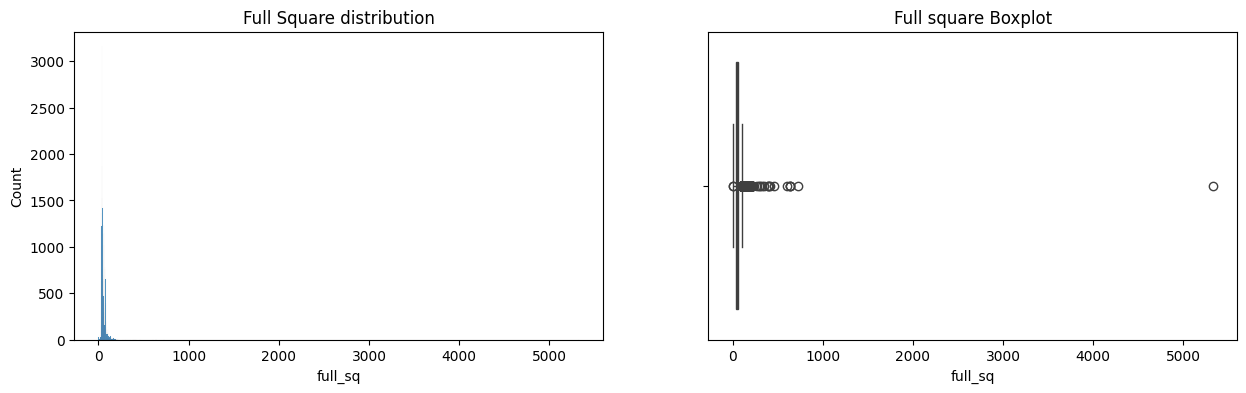

In [11]:
#построим гистограмму и коробчатую диаграмму
# для признака полной площади(full_sq)
fig, axes = plt.subplots(nrows=1 , ncols =2, figsize =(15,4))
histplot =  sns.histplot(
    data= sber_data,
    x='full_sq',
    ax=axes[0]
)
histplot.set_title('Full Square distribution')
boxplot= sns.boxplot(
    data= sber_data,
    x='full_sq',
    ax=axes[1]
)
boxplot.set_title('Full square Boxplot')

Именно так выглядят типичные графики с выбросами . Гистограмма , реализованная в сиабот самостоятельно подбирает кол-во столбцов,  необходимых  для наилучшей визуализации распределения. когда признак содержит выбивающиеся значения ,  число столбцов становится слишком велико ,  и в итоге получается это

По этой же причине получается сплюснутая гистограмма 
основная часть кв имеет общую площать менее 250 кв м и только немного данных  выбиваются из этого интревала\
Визуализация помогает определить наличие выбросов.Для того чтобы их  найти необзодимо применить статистические подходы 


*Метод межквартильного размаха(Метод Тьокки*\
АЛГОРИТМЫ МЕТОДА:\
1. Вычислить 25-й и 75-й квантиль(1 и 3 квантиль) - [Math Processing Error] b [Math Processing Error] для признака ,  который мы иследуем 
2. Вычислить межквартильное расстояние 
3. Вычислить верхнюю и нижние границы Тьюки
4. Найти наблюдения которые выходят за пределы границ\
В соответские с этим алгоритмом напишем функцию\
Квантили Вычисляются с помощью метода quantile()



In [12]:
def outliers_iqr(data, feature):
    x= data[feature]
    quartile_1, quartile_3= x.quantile(0.25), x.quantile(0.75), 
    iqr= quartile_3-quartile_1
    lower_bound= quartile_1-(iqr*1.5)
    upper_bound = quartile_3+(iqr*1.5)
    outliers = data[(x< lower_bound)| (x >upper_bound)]
    cleaned= data[(x>= lower_bound)& (x<= upper_bound)]
    return outliers, cleaned

In [13]:
#применим эту функцию к таблицу сбера по признаку общей площади
# # и выведем размерность
outliers,cleaned = outliers_iqr(sber_data, 'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

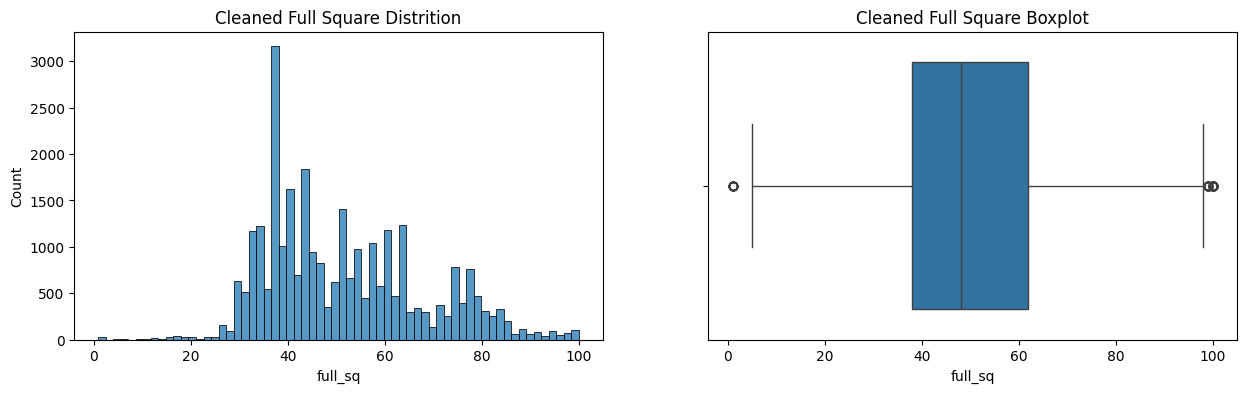

In [14]:
#согласно методу Тьюки , под выбросы попали 963 записи в таблицу
#Давайте построим диаграмм уна основе новых  данных 
fig, axes =  plt.subplots(nrows=1, ncols=2, figsize=(15,4))
histplot= sns.histplot(
    data=cleaned,
    x='full_sq',
    ax=axes[0]
)
histplot.set_title('Cleaned Full Square Distrition')
boxplot=sns.boxplot(
    data=cleaned,
    x='full_sq',
    ax=axes[1]
)
boxplot.set_title('Cleaned Full Square Boxplot')

На первый взгляд все стрерильно, но коробчатая диграмма говорит что еще есть одиночные выброы с обеих сторон , к тому же сильно урезался диапазон площади кв , сейчас площать состовляет примерно около 100кв м 
*МЕТОД НЕ РАБОТАЕТ?*
Причина в том что после удаления выбросов квартили рассчитываются заново , основываясь на новых данных. И поэтому найдены новые точки которые считаются выбросами.

класический метод межквартильного размага не учитывает особенностей распределения. Он требует, чтобы данные были распределены +- нормально ( гистограмма должна быть похожа на колокол) и требуе от распределения примерной семметричности (чтобы концы у гистограммы были одинаковы со всех сторон)\
У нас же распределение далеко отличается от зачвленных критериев. правый хвост длинее левого , что в полне естественно для москвы . Попросту говоря метод не опрадал себя. 
**Я могу самостоятельно подбирать кол-во межквартильных размаха , в зависимости от данных**

In [15]:
#TEST
def outliers_iqr_mod(data, feature, left=1.5, right=1.5):
    x= data[feature]
    quartile_1, quartile_3= x.quantile(0.25), x.quantile(0.75), 
    iqr= quartile_3-quartile_1
    lower_bound= quartile_1-(iqr*left)
    upper_bound = quartile_3+(iqr*right)
    outliers = data[(x< lower_bound)| (x >upper_bound)]
    cleaned= data[(x>= lower_bound)& (x<= upper_bound)]
    return outliers, cleaned

outliers,cleaned = outliers_iqr_mod(data = sber_data, feature = 'full_sq', left = 1, right = 6)
print(outliers.shape[0])




59


Если мы построим гистограмму и коробчатую диаграмму на полученных  данных  то увидем вот такую картинку


Text(0.5, 1.0, 'Cleaned Full Square Boxplot')

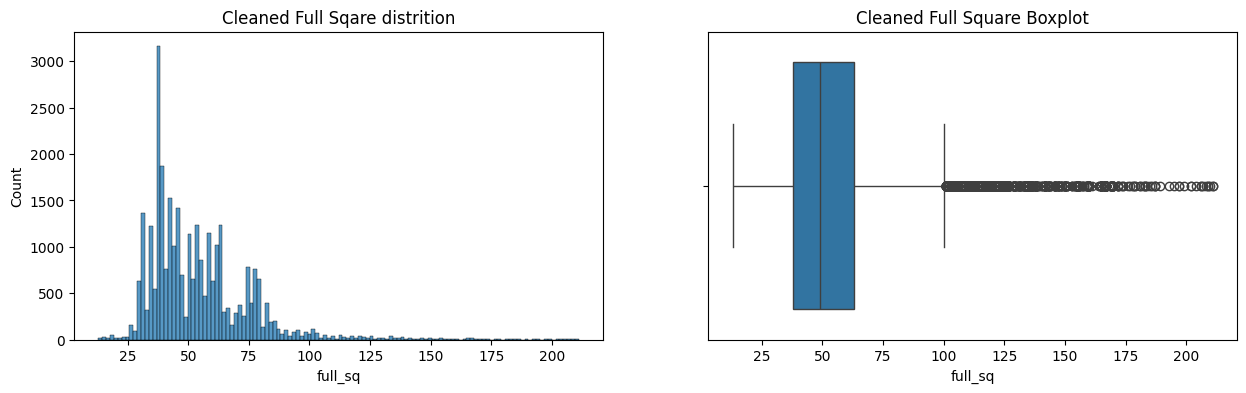

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,4))
histplot= sns.histplot(
    data=cleaned,
    x='full_sq',
    ax=axes[0]
)
histplot.set_title('Cleaned Full Sqare distrition')

boxplot=sns.boxplot(
    data=cleaned,
    x='full_sq',
    ax=axes[1]
)

boxplot.set_title('Cleaned Full Square Boxplot')

#это уже больше похоже на рынок недвижимости ,  основная часть кв от 25-85кв\м
#далее частота падает 

**Метод z-отклонений ( метод сигм )**

Метод основанный на *правиле 3 сигм*
Правило 3 сигм гласит : если распределение данных является нормальным , то 99,73% лежат в интервале от (мю-3сигмы , мю +3сигмы), где мю-математическое ожидание ( для выборки это среднее значение )\
а сигма - стандартное отклонение\
Наблюдения которые лежат за пределами данного интервала , будут считаться выбросами 

схематично это выглядит так 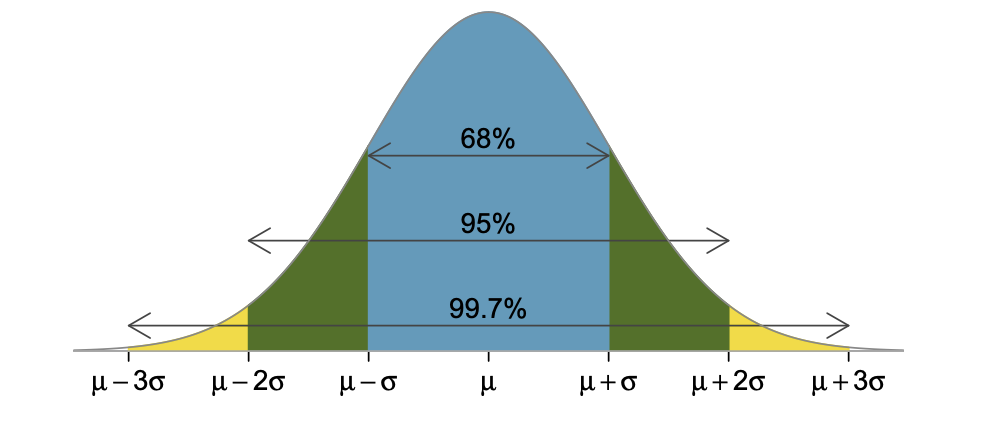

Что делать если данные не распределены нормально?\
На такой случай используем *ЛОГАРИФМИРОВАНИЕ*
оно может приветси исходное распределение к подобию нормального 

Рассмотрим логарифмирование на примере.\
Построим две гисторграммы( признак расстояние до мкад (mkad_km))\
Одна в обычном маштабе , вторая в логарифмическом\
Логарифмировать будет через библиотеку numpy  с помощбю функции log()(Натуральный логарифм по основанию числа е). Тк признак имеет в себе значения 0 то к признаку добавляем +1

Text(0.5, 1.0, 'Log MKAD KM Distribution')

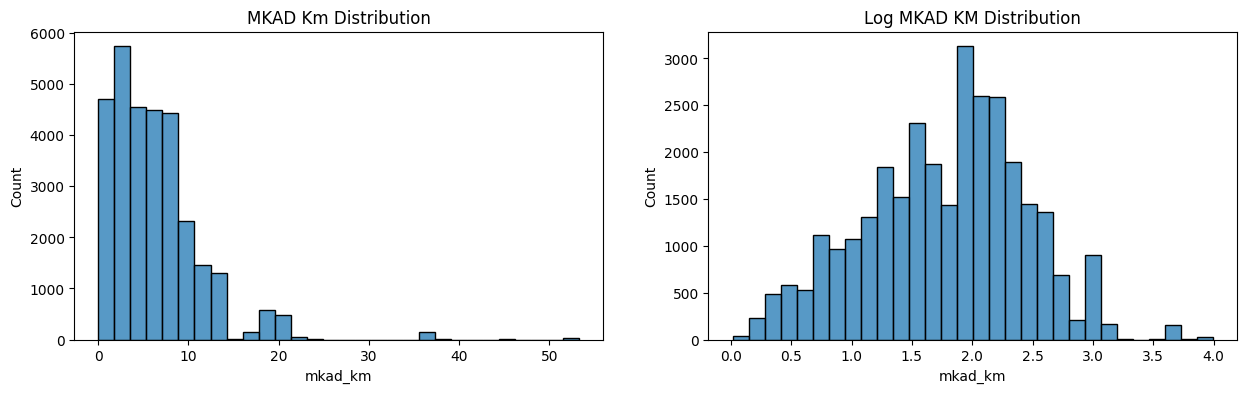

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,4))
#гистограмма обычного признака 
histplot= sns.histplot(
    sber_data['mkad_km'],
    bins=30,
    ax=axes[0]
)
histplot.set_title('MKAD Km Distribution')

#гистограмма в лог маштабе 
log_mkad_km= np.log(sber_data['mkad_km']+1)
histplot= sns.histplot(
    log_mkad_km,
    bins=30,
    ax=axes[1]
    )
histplot.set_title('Log MKAD KM Distribution')

Левое распределение напоминает лог нормальное распределение с наличием потенциальны  выбросов- пеньков,  далеко стоящих  от основной массы наблюдений\
Взяв натуральный логарифм от левого распределения,  мы получаем правое,  которое напоминает , слегда перекошенное нормальное.\
Слева от моды (самого высокого столбика) наблюдается чуть больше наблюдений,  нежели справа. По научному называется *Распределние имеет левостороннюю ассиметрию*

**Численный показатель ассиметрии можно вычислить при помощью метода ниже**


In [18]:

print(log_mkad_km.skew())
# -0.14263612203024953

-0.14263612203024953


**Правосторонняя ассиметрия это** Аs>0\
**Левосторонняя ассиметрия это** As <0

**Алгоритм метода z-отклонения**
1. вычислить мат ожидание(среднее)и сандартное отклонение признака х
2. вычислить верхнюю и нижнюю границу интервала как\ 
bound_lower=мю-3сигмы\
bound_right=мю+3сигмы
3. найти наблюдения которые выходят за пределы границ 


напишем функцию  outliers_z_score() 
которая реализует алгоритм\
На вход она принимает dataframe и признак по которому ищуются выбросы.\
В дополнение добавим в функцию возможность работы в лог маштабе:\
Для этого введм аргумент log_scale.\
Если он равен Truе,  то будем логарифмировать рассматриваемый признак инече ,  оставляем как есть\
Как и раньше функция будет возращать выбросы и очищенные данные 


In [19]:
def outliers_z_score(data,feature,log_scale=False):
    if log_scale:
        x=np.log(data[feature]+1)
    else:
        x= data[feature]
    mu= x.mean()
    sigma=x.std()
    lower_bound=mu-3*sigma
    upper_bound=mu+3*sigma
    outliers=data[(x<lower_bound)| (x>upper_bound)]
    cleaned= data[(x>=lower_bound)&(x<=upper_bound)]
    return outliers, cleaned

Применим эту функцию к таблицу sber_data, и призннаку mkad_km\
И выведем размерности результатов 


In [20]:
outliers,cleaned= outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результатирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результатирующее число записей: 30438


Итак, Метод z-отклонения нашел нам 33 потенциальных  отклонения,  по расстоянию  от мкад. давайте посмотрим в каких регионах


In [21]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


пробиваем их  и видем что, эо самые отдаленые районы мск\
Возникает вопрос : Надо ли их  считать выбросами?\
Вопрос в действительности не имеет определенного ответа: с одной стороны, метод прямо-таки говорит нам об этом, а с другой — эти наблюдения имеют право на существование, ведь они являются частью Москвы.\


Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

Text(0.5, 1.0, 'Log Mkad Km Distribution')

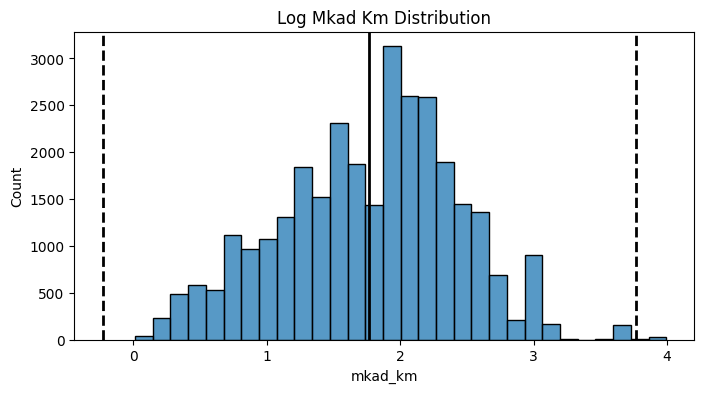

In [22]:
fig,ax=plt.subplots(1,1,figsize=(8,4))
log_mkad_km=np.log(sber_data['mkad_km']+1)
histplot=sns.histplot(
    log_mkad_km,
    bins=30,
    ax=ax
)
histplot.axvline(log_mkad_km.mean(), color='k',lw=2)
histplot.axvline(log_mkad_km.mean()+3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()-3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Mkad Km Distribution')

Итак, мы графически построили интервал метода трёх сигм поверх нашего распределения. Он показывает, какие наблюдения мы берём в интервал, а какие считаем выбросами. Легко заметить, что среднее значение (жирная вертикальная линия) находится левее моды. Это свойство распределений с левосторонней асимметрией. Также видны наблюдения, которые мы не захватили своим интервалом (небольшой «пенёк» правее верхней границы) — это и есть наши квартиры из поселений «Роговское» и «Киевский». Очевидно, что если немного (меньше чем на одну сигму) «сдвинуть» верхнюю границу вправо, то мы захватим эти наблюдения. Давайте сделаем это.

***Резюме по методам поиска выбросов***

Мы рассмотрели классические методы выявления аномальных данных. Как вы сами поняли, каждый из них имеет свои преимущества и недостатки.

**Метод ручного поиска** тяжело автоматизировать, однако вы сами организовываете проверки, следите за процессом отсеивания выбросов и руководствуетесь не только статистикой, но и здравым смыслом. К тому же из всех представленных только этот метод способен выявить логические нестыковки в данных (например, общая площадь меньше жилой или число этажей более 77 в районе, где нет таких зданий). Обычно этот метод используется в комплексе с другими, чтобы удостовериться в том, что найденные данные действительно являются выбросами, и произвести логическую очистку, на которую неспособны другие методы.\
**Методы межквартильного размаха и z-отклонений** довольно просты в реализации и основаны на стройной математической теории, а не на эвристиках. Но это их преимущество и недостаток. Оба метода разработаны для данных, распределённых приблизительно нормально. Проблема в том, что далеко не всё в мире имеет нормальное распределение. Необходимо внимательно «рыться» в данных, совершать дополнительные преобразования, чтобы привести их хотя бы к подобию нормального распределения, либо подбирать границы методов, чтобы учитывать особенности распределений. В противном случае методы начинают считать выбросами всё, что не вписывается в жёсткие границы, и вы рискуете лишиться важных данных! Учитывайте это в своей работе и всегда проверяйте результаты.

Другие методы поиска выбросов

Конечно, наука о данных не ограничивается тремя методами. Скажем даже больше: в машинном обучении есть отдельная активно развивающаяся подобласть, именуемая Outliers (Anomaly) Detection. Она включает в себя большое количество методов для поиска аномалий в совершенно различных видах данных: от временных рядов до географических данных. Специалисты этой области обучают целые модели, которые помогают отыскать выбросы в данных. 

Мы рассмотрели самые простые, но очень распространённые методы поиска выбросов, главный недостаток которых состоит в том, что они основываются на информации только по одному признаку. Для глубокого поиска аномалий могут применяться методы, которые используют информацию обо всех признаках.

Например, для поиска аномалий часто используется метод кластеризации DBSCAN, о котором мы ещё будем говорить в модуле по кластеризации данных далее. Метод пытается объединить данные в группы (кластеры), например: квартиры низкого, среднего и премиального класса, опираясь на все признаки. Всё, что не попало ни в какой из кластеров, помечается как выброс (шум).

In [ ]:
import pandas as pd
import numpy as np
df=sber_data.copy()


# Введите свое решение ниже
def outliers_z_score_mod(data,feature,log_scale=False, left=3,right=3):
    if log_scale:
        x=np.log(data[feature]+1)
    else:
        x= data[feature]
    mu= x.mean()
    sigma=x.std()
    lower_bound=mu-sigma*left
    upper_bound=mu+sigma*right
    outliers=data[(x<lower_bound)| (x>upper_bound)]
    cleaned= data[(x>=lower_bound)&(x<=upper_bound)]
    return outliers, cleaned

outliers,cleaned =outliers_z_score_mod(data=df,feature='price_doc',left=3.7,right=3.7, log_scale=True)
print(outliers.shape[0])

146


In [26]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_iqr_mod(sber_data, 'price_doc', left=3, right=3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')

Число выбросов по методу Тьюки: 92
